# ASL Project

In [1]:
#Import libraries
import numpy as np
import random

# Imports to view data
import cv2
import pandas as pd
from glob import glob

# Visualization
from keras.utils import print_summary
from matplotlib import pyplot as plt

#ML libraries
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint  
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
#Directory paths
TRAIN_DIR = "../Dataset/asl_alphabet_train/asl_alphabet_train"
TEST_DIR = "../Dataset/asl_alphabet_test"
MODEL_DIR = './Model'
MODEL_PATH = MODEL_DIR+"/FinalModel.h5"
MODEL_WEIGHT_PATH = MODEL_DIR+"/FinalModel_Weight.h5"

In [3]:
# Set global variables
TARGET_SIZE = (64, 64)
TARGET_DIMS = (64, 64, 3) # add channel for RGB
CLASSES = 29
VALIDATION_SPLIT = 0.1
BATCH_SIZE = 64

## Data Augmentation

In [4]:
#Load Train dataset
train_image_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=VALIDATION_SPLIT
)

validation_image_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    validation_split=VALIDATION_SPLIT
)

train_generator = train_image_generator.flow_from_directory(TRAIN_DIR, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, shuffle=True, subset="training")
val_generator = validation_image_generator.flow_from_directory(TRAIN_DIR, target_size=TARGET_SIZE, batch_size=BATCH_SIZE, subset="validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


## Model

In [5]:
#Define Model Xception Model
def Xception_model_build():
    from keras.applications.xception import Xception
    from keras.layers import Input

    input_tensor = Input(shape=TARGET_DIMS)
    model = Xception(input_tensor = input_tensor, weights=None, include_top=True, classes= CLASSES)
    return model

In [6]:
from keras.models import Model
base_model = Xception_model_build()
x = base_model.output
#x = (Dense(CLASSES, activation='softmax'))(x)
model = Model(inputs=base_model.input, outputs=x)

#Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()
model.save(MODEL_PATH)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 31, 31, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 31, 31, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 31, 31, 32)   0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [12]:
#Checkpointer to save the best models
checkpointer = ModelCheckpoint(filepath=MODEL_WEIGHT_PATH, 
                               verbose=1, save_best_only=True)

steps_per_epoch = int( np.ceil(len(train_generator)*2 / BATCH_SIZE) )
validation_steps = int( np.ceil(len(val_generator)*2 / BATCH_SIZE) )

history = model.fit_generator(train_generator, validation_data=val_generator, 
                    steps_per_epoch =  steps_per_epoch,
                    validation_steps = validation_steps,
                    epochs=50, callbacks=[checkpointer], verbose=1)

Epoch 1/50
39/39 [==============================] - 267s 7s/step - loss: 2.9346 - acc: 0.1182 - val_loss: 15.6648 - val_acc: 0.0281

Epoch 00001: val_loss improved from inf to 15.66477, saving model to ./Model/FinalModel_Weight.h5
Epoch 2/50
39/39 [==============================] - 268s 7s/step - loss: 2.6939 - acc: 0.1767 - val_loss: 13.2198 - val_acc: 0.0375

Epoch 00002: val_loss improved from 15.66477 to 13.21983, saving model to ./Model/FinalModel_Weight.h5
Epoch 3/50
39/39 [==============================] - 272s 7s/step - loss: 2.4899 - acc: 0.2139 - val_loss: 14.3248 - val_acc: 0.0406

Epoch 00003: val_loss did not improve from 13.21983
Epoch 4/50
39/39 [==============================] - 276s 7s/step - loss: 2.3047 - acc: 0.2612 - val_loss: 14.8039 - val_acc: 0.0406

Epoch 00004: val_loss did not improve from 13.21983
Epoch 5/50
39/39 [==============================] - 273s 7s/step - loss: 2.1789 - acc: 0.2941 - val_loss: 11.9427 - val_acc: 0.0813

Epoch 00005: val_loss improved

39/39 [==============================] - 271s 7s/step - loss: 0.5163 - acc: 0.8161 - val_loss: 3.4576 - val_acc: 0.6094

Epoch 00042: val_loss did not improve from 1.10824
Epoch 43/50
39/39 [==============================] - 272s 7s/step - loss: 0.5100 - acc: 0.8345 - val_loss: 1.9604 - val_acc: 0.6937

Epoch 00043: val_loss did not improve from 1.10824
Epoch 44/50
39/39 [==============================] - 271s 7s/step - loss: 0.5047 - acc: 0.8321 - val_loss: 0.7727 - val_acc: 0.8344

Epoch 00044: val_loss improved from 1.10824 to 0.77273, saving model to ./Model/FinalModel_Weight.h5
Epoch 45/50
39/39 [==============================] - 273s 7s/step - loss: 0.4653 - acc: 0.8498 - val_loss: 0.8947 - val_acc: 0.8250

Epoch 00045: val_loss did not improve from 0.77273
Epoch 46/50
39/39 [==============================] - 272s 7s/step - loss: 0.4898 - acc: 0.8381 - val_loss: 2.2489 - val_acc: 0.6188

Epoch 00046: val_loss did not improve from 0.77273
Epoch 47/50
39/39 [=======================

# Visualization of training the model

In [13]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


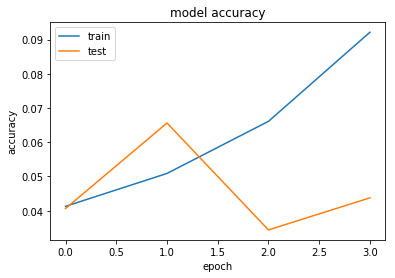

In [10]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

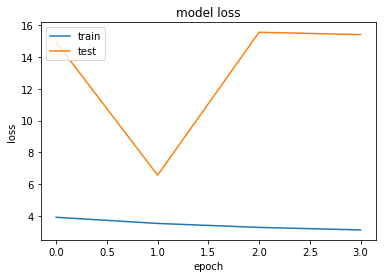

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
#Predict on validation dataset
predictions = model.predict_generator(val_generator, steps=1)        
predictions = np.argmax(predictions, axis=-1) #multiple categories
label_map = (train_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v

predictions = [label_map[k] for k in predictions]

print(predictions, len(predictions))

loss, acc = model.evaluate_generator(val_generator, steps=1, verbose=0)

print(loss,",",acc)

['D', 'P', 'space', 'del', 'A', 'H', 'nothing', 'R', 'M', 'M', 'K', 'del', 'R', 'J', 'D', 'H', 'E', 'W', 'A', 'B', 'M', 'nothing', 'K', 'O', 'del', 'J', 'Z', 'A', 'L', 'O', 'E', 'H', 'Q', 'V', 'I', 'X', 'E', 'E', 'O', 'del', 'L', 'E', 'V', 'S', 'E', 'J', 'A', 'D', 'P', 'R', 'R', 'Q', 'A', 'K', 'N', 'C', 'E', 'M', 'L', 'Z', 'Q', 'J', 'Y', 'S'] 64
0.8570610880851746 , 0.78125


In [30]:
test_image_generator = ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True,
)

test_generator = test_image_generator.flow_from_directory(TEST_DIR, target_size=TARGET_SIZE, batch_size=28, shuffle=False, 
    class_mode='categorical')
print(test_generator.classes)

Found 28 images belonging to 1 classes.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
#Predict
test_generator.reset()
predictions = model.predict_generator(test_generator, steps=1)
predictions = np.argmax(predictions, axis=1) #multiple categories
label_map = (train_generator.class_indices)
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v

predictions = [label_map[k] for k in predictions]

print(predictions, len(predictions))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'V', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space'] 28


In [32]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
#print(results)

                              Filename Predictions
0         asl_alphabet_test\A_test.jpg           A
1         asl_alphabet_test\B_test.jpg           B
2         asl_alphabet_test\C_test.jpg           C
3         asl_alphabet_test\D_test.jpg           D
4         asl_alphabet_test\E_test.jpg           E
5         asl_alphabet_test\F_test.jpg           F
6         asl_alphabet_test\G_test.jpg           G
7         asl_alphabet_test\H_test.jpg           H
8         asl_alphabet_test\I_test.jpg           I
9         asl_alphabet_test\J_test.jpg           J
10        asl_alphabet_test\K_test.jpg           K
11        asl_alphabet_test\L_test.jpg           L
12        asl_alphabet_test\M_test.jpg           M
13        asl_alphabet_test\N_test.jpg           N
14        asl_alphabet_test\O_test.jpg           O
15        asl_alphabet_test\P_test.jpg           P
16        asl_alphabet_test\Q_test.jpg           Q
17        asl_alphabet_test\R_test.jpg           R
18        asl_alphabet_test\S_t

In [33]:
count = 0
for file,prediction in zip(filenames,predictions):
    #print(file,prediction)
    if(prediction+'_test' in file):
        count+=1
        
print("accuracy",count/len(filenames)*100)

accuracy 96.42857142857143
